## Rogistic regression by stats models 

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [8]:
dfX = pd.DataFrame(X, columns=iris.feature_names)
dfy = pd.DataFrame(y, columns=["species"])

In [9]:
df = pd.concat([dfX, dfy], axis = 1)

In [14]:
df = df[["sepal length (cm)", "species"]]
df = df[df.species.isin([0,1])]
df = df.rename(columns={"sepal length (cm)":"sepal_length"})

In [16]:
df

,sepal_length,species
0,5.1,0
1,4.9,0
2,4.7,0
3,4.6,0
4,5.0,0
...,...,...
95,5.7,1
96,5.7,1
97,6.2,1
98,5.1,1


In [19]:
import statsmodels.api as sm

In [20]:
model = sm.Logit.from_formula("species ~ sepal_length", data = df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.321056
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sun, 03 Jan 2021   Pseudo R-squ.:                  0.5368
Time:                        14:47:52   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 6.320e-18
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -27.8315      5.434     -5.122      0.000     -38.481     -17.182
sepal_length     5.1403

In [28]:
# 나누는 기준값 
(27.8315) / 5.1403

5.414372701982375

In [22]:
y_pred = result.predict(df.sepal_length) >= 0.5

from sklearn.metrics import confusion_matrix

confusion_matrix(df.species, y_pred)

array([[45,  5],
       [ 6, 44]])

In [23]:
from sklearn.metrics import classification_report
print(classification_report(df.species, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        50
           1       0.90      0.88      0.89        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



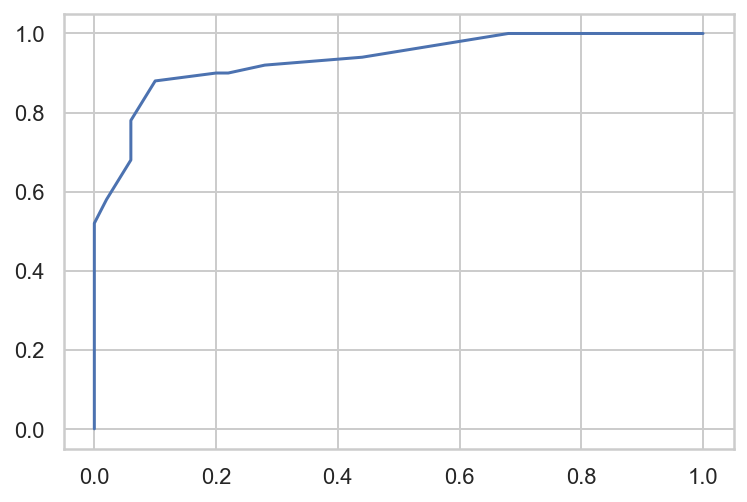

In [26]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(df.species, result.predict(df.sepal_length))
plt.plot(fpr, tpr)
plt.show()
%matplotlib inline

In [27]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9326

# 미국 의대생 입학데이터 : 로지스틱회귀 이진분류

In [29]:
data_med = sm.datasets.get_rdataset("MedGPA", package = "Stat2Data")
df_med = data_med.data
df_med.tail()

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
50,D,0,M,2.41,2.72,8,8,8.0,8,32,7
51,D,0,M,3.51,3.56,11,8,6.0,9,34,6
52,A,1,F,3.43,3.48,7,10,7.0,10,34,14
53,D,0,M,2.61,2.80,7,5,NaN,6,18,6
54,D,0,M,3.36,3.44,11,11,8.0,9,39,1


In [47]:
df_med.columns

Index(['Accept', 'Acceptance', 'Sex', 'BCPM', 'GPA', 'VR', 'PS', 'WS', 'BS',
       'Apps'],
      dtype='object')

In [30]:
df_med = df_med[[	"Accept"	,"Acceptance"	,"Sex"	,"BCPM"	,"GPA"	,"VR"	,"PS"	,"WS"	,"BS"	,"Apps"]]

In [32]:
df_med.tail()

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,Apps
50,D,0,M,2.41,2.72,8,8,8.0,8,7
51,D,0,M,3.51,3.56,11,8,6.0,9,6
52,A,1,F,3.43,3.48,7,10,7.0,10,14
53,D,0,M,2.61,2.80,7,5,NaN,6,6
54,D,0,M,3.36,3.44,11,11,8.0,9,1


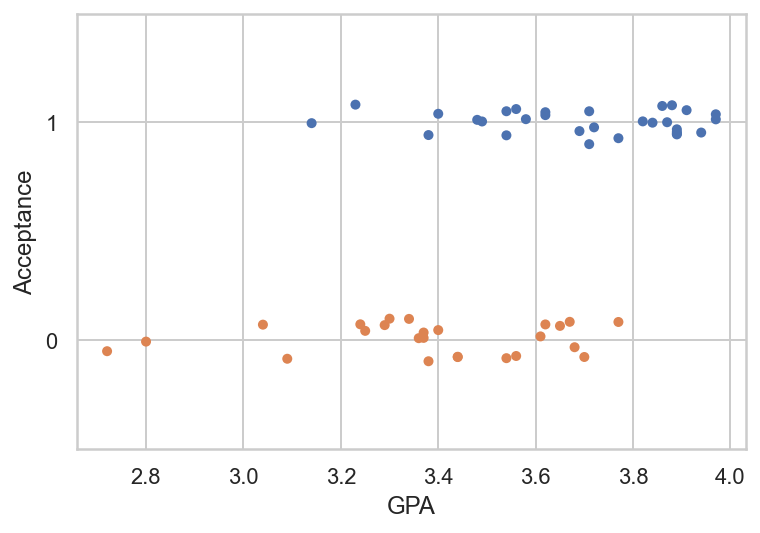

In [45]:
sns.stripplot(x = "GPA", y = "Acceptance", data = df_med,
               jitter=True, orient='h', order=[1, 0])
plt.grid(True)
plt.show()

In [53]:
model_med = sm.Logit.from_formula("Acceptance ~ Sex + BCPM + GPA + VR + PS + WS + BS + Apps", data = df_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.280736
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   54
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            8
Date:                Sun, 03 Jan 2021   Pseudo R-squ.:                  0.5913
Time:                        17:08:09   Log-Likelihood:                -15.160
converged:                       True   LL-Null:                       -37.096
Covariance Type:            nonrobust   LLR p-value:                 6.014e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.6414     15.600     -2.990      0.003     -77.216     -16.067
Sex[T.M]      -2.2835      1.

In [59]:
result_med.predict(df_med)

0     0.119286
1     0.999823
2     0.540585
3     0.978812
4     0.996344
5     0.587391
6     0.999205
7     0.075526
8     0.995005
9     0.983484
10    0.988786
11    0.245944
12    0.705336
13    0.792113
14    0.000192
15    0.668787
16    0.163157
17    0.464983
18    0.108856
19    0.999988
20    0.920583
21    0.609054
22    0.999958
23    0.990933
24    0.090171
25    0.620632
26    0.330335
27    0.976908
28    0.957806
29    0.937300
30    0.996740
31    0.039394
32    0.887071
33    0.136189
34    0.448309
35    0.981857
36    0.000027
37    0.209549
38    0.985837
39    0.089574
40    0.000215
41    0.047204
42    0.984527
43    0.833446
44    0.406864
45    0.860486
46    0.999999
47    0.004094
48    0.056901
49    0.163769
50    0.000025
51    0.035084
52    0.884775
53         NaN
54    0.100784
dtype: float64

In [63]:
df_med["Prediction"] = result_med.predict(df_med)

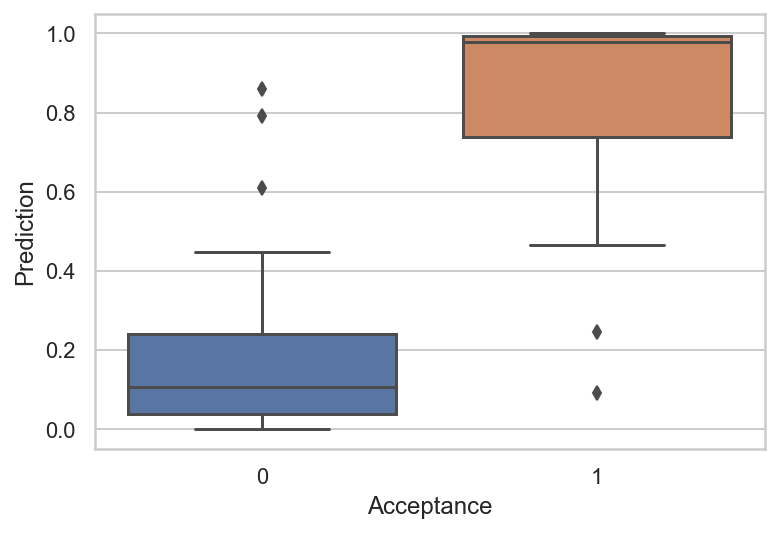

In [64]:
sns.boxplot(x="Acceptance",y="Prediction", data = df_med)
plt.show()

In [65]:
model_med = sm.Logit.from_formula("Acceptance ~  PS + BS ", data = df_med)
result_med = model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.460609
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   55
Model:                          Logit   Df Residuals:                       52
Method:                           MLE   Df Model:                            2
Date:                Sun, 03 Jan 2021   Pseudo R-squ.:                  0.3315
Time:                        17:25:34   Log-Likelihood:                -25.333
converged:                       True   LL-Null:                       -37.896
Covariance Type:            nonrobust   LLR p-value:                 3.503e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.5427      4.684     -3.318      0.001     -24.723      -6.362
PS             0.4798      0.

# 0.4798PS + 1.1464BS

In [109]:
from sklearn.datasets import load_iris

In [110]:
data_iris = load_iris()

In [111]:
X = data_iris.data
y = data_iris.target

In [112]:
dfX = pd.DataFrame(X, columns = data_iris.feature_names)
dfy = pd.DataFrame(y, columns = ["Species"])

In [113]:
df = pd.concat([dfX, dfy], axis=1)

In [114]:
df = df[df.Species.isin([1, 2])]

In [115]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [116]:
df = df.rename(columns={"sepal length (cm)":"sepal_length",	"sepal width (cm)":"sepal_width"	, "petal length (cm)": "petal_length", 	"petal width (cm)": "petal_width"})

In [117]:
df["Species"] -= 1

In [118]:
df.Species.unique()

array([0, 1])

In [123]:
import statsmodels.api as sm


# 모델객체 만들어서 fit

In [128]:
model = sm.Logit.from_formula("Species ~ sepal_length+ sepal_width+ petal_length+ petal_width", data = df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.059493
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                Species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Sun, 03 Jan 2021   Pseudo R-squ.:                  0.9142
Time:                        18:09:20   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.947e-26
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -42.6378     25.708     -1.659      0.097     -93.024       7.748
sepal_length    -2.465

In [130]:
y_pred = result.predict(df) >= 0.5

from sklearn.metrics import confusion_matrix
confusion_matrix(df.Species, y_pred)

array([[49,  1],
       [ 1, 49]])

In [132]:
from sklearn.metrics import classification_report
print(classification_report(df.Species, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.98      0.98      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



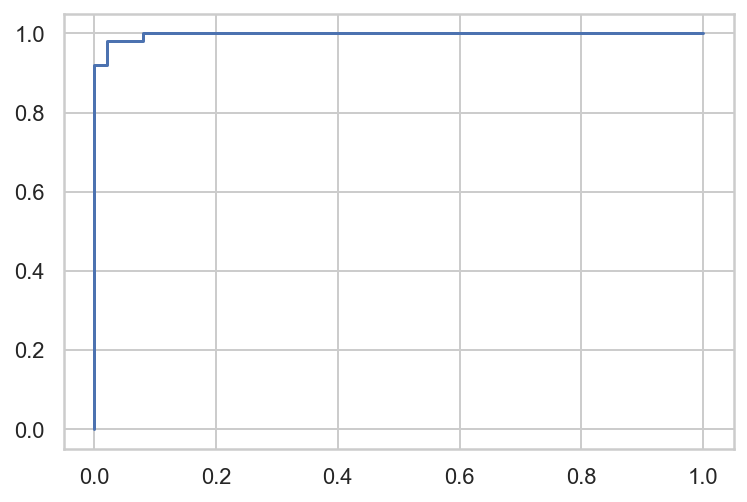

In [134]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(df.Species, result.predict(df))
plt.plot(fpr, tpr)
plt.show()

In [135]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9972000000000001